# Visualization Meetup: Data Jam

By Valentina Fontiveros

## Challenge: 
Create relevant visualizations from a unknown dataset in less than 3 hours.
## Objective: 
Explore a dataset containing information about code projects from several U.S. federal agencies and extract valuable insights from it.

## Import Libraries

In [51]:
#import libraries
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [52]:
# open json file 
with open('all_repos_with_nesting.json', 'r') as myfile:
    data=myfile.read()

# parse file
obj = json.loads(data)

## Extract Information 

In [54]:
# extract languages, agency, tags, and year as lists
lang = []    # Coding language: HTML, Python, etc
agency = []  # Acronym for federal agency: NSA, DOE, etc
tags = []    # Tags for projects: Github etc
year = []    # Year project created

for index in range(len(obj)):
    try:
        lang.append(obj[index]['languages'])
    except:
        lang.append(['Unknown'])
    try:
        agency.append(obj[index]['agency']['acronym'])
    except:
        agency.append('Unknown')
    try:
        tags.append(obj[index]['tags'])
    except:
        tags.append(['Unknown'])
    try: 
        year.append(obj[index]['date']['created'].split('T')[0].split('-')[0])
    except:
        year.append('Unknown')
        

In [55]:
# extract individal languages
languages = []
agency_lang = []
year_lang = []
for index, entry in enumerate(lang):
    for language in entry:
        languages.append(language)
        agency_lang.append(agency[index])
        year_lang.append(year[index])

In [56]:
# extract individual tags
tags_indiv = []
for entry in tags:
    for tag in entry:
        tags_indiv.append(tag)

In [53]:
# function to extract unique entries in list
def unique(list1): 
  
    # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x) 
    # print list 
    return(unique_list)

In [57]:
# extract unique languages and tags
unique_languages = unique(languages)
unique_tags = unique(tags_indiv)
unique_agencies = unique(agency)
unique_year = unique(year)

## Plotting

In [61]:
# create a dataframe 

df = pd.DataFrame(languages,agency_lang).reset_index()

In [62]:
df.columns = ['Agency','Language']

In [77]:
df.head()

,Agency,Language
0,TREASURY,HTML
1,TREASURY,CSS
2,TREASURY,Python
3,TREASURY,HTML
4,TREASURY,CSS


In [79]:
# count number of projects for each language (all agencies)
lang_count =[]
for l in unique_languages: 
    lang_count.append(df[df.Language == l].sum())

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

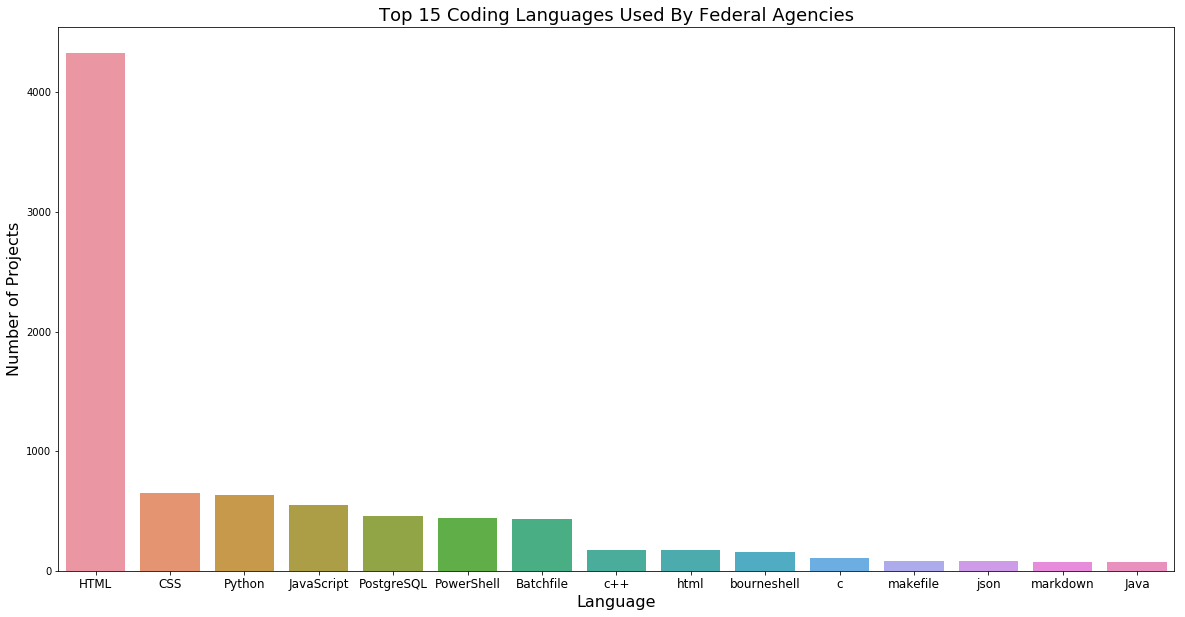

In [109]:
# plot the top 15 coding languages used by federal agencies

plt.figure(figsize=(20,10))
sns.barplot(unique_languages[0:15],df.Language.value_counts()[0:15])
plt.xlabel('Language',fontsize=16)
plt.ylabel('Number of Projects', fontsize =16)
plt.title('Top 15 Coding Languages Used By Federal Agencies',fontsize=18)
plt.xticks(fontsize=12)

In [130]:
# create a grouped dataframe 
df_grouped = pd.DataFrame(df.Language.groupby(df.Agency).value_counts())

In [144]:
nsa = df[df.Agency=='NSA']

In [156]:
nsa.Language.value_counts().keys()

Index(['Python', 'HTML', 'PowerShell', 'Shell', 'Makefile', 'CSS',
       'JavaScript', 'C', 'Java', 'Batchfile', 'C++', 'Unknown', 'Objective-C',
       'Dockerfile', 'Assembly', 'Ruby', 'M4', 'Roff', 'XSLT',
       'Jupyter Notebook', 'CMake', 'C#', 'Lex', 'Yacc', 'TeX', 'PHP', 'GAP',
       'XS', 'Fortran', 'HiveQL', 'Haskell', 'TypeScript', 'ANTLR', 'TSQL',
       'QMake', 'GDB', 'Perl', 'OpenEdge ABL', 'Scheme', 'Pawn', 'Emacs Lisp',
       'Perl 6', 'Swift', 'YARA', 'Mathematica', 'q'],
      dtype='object')

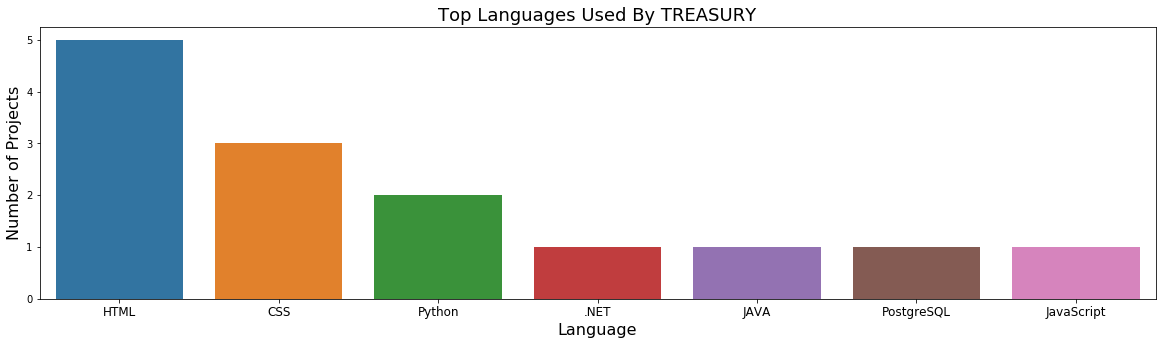

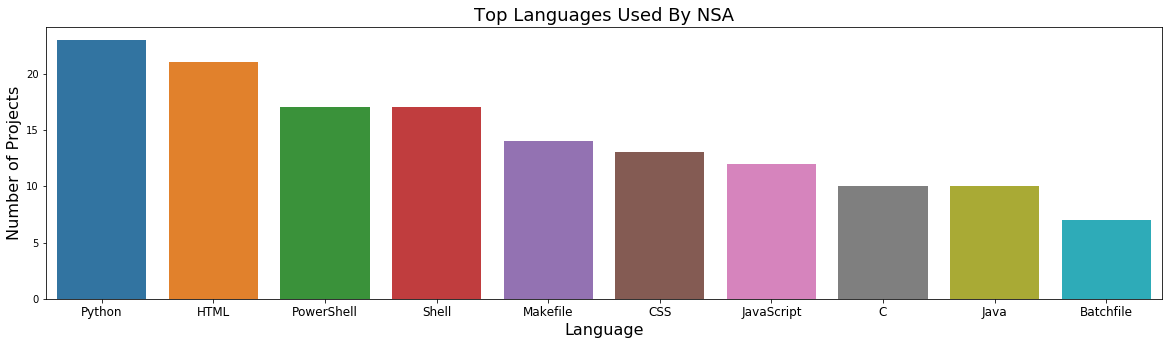

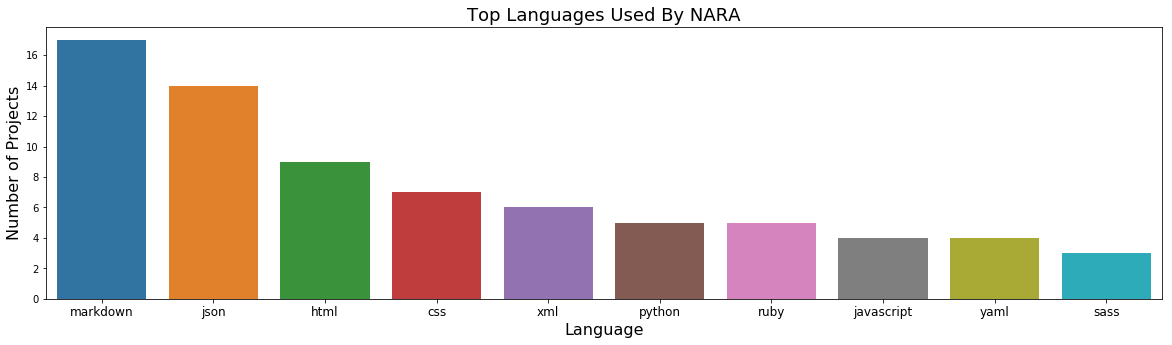

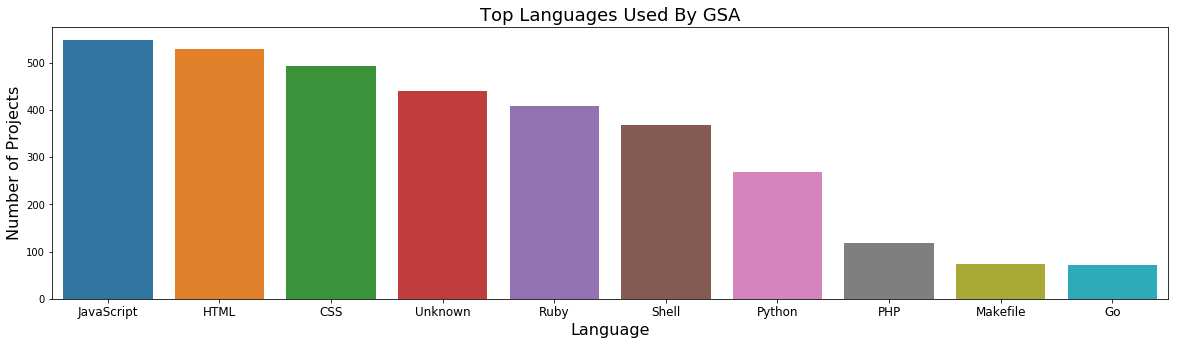

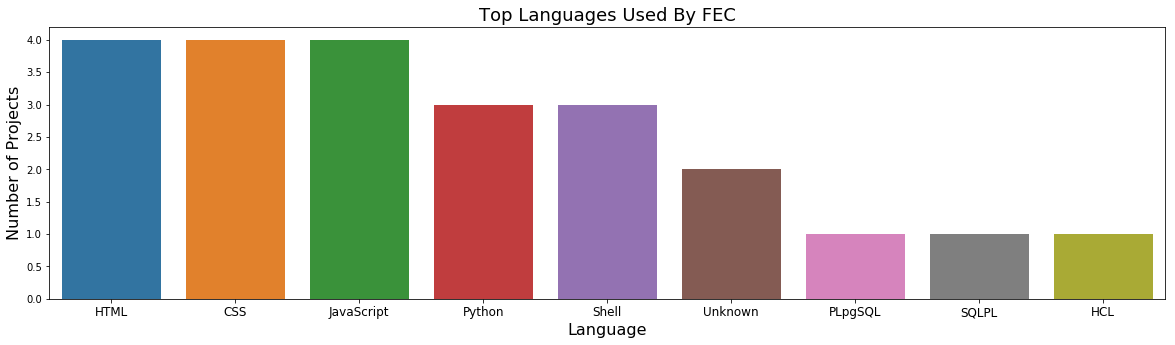

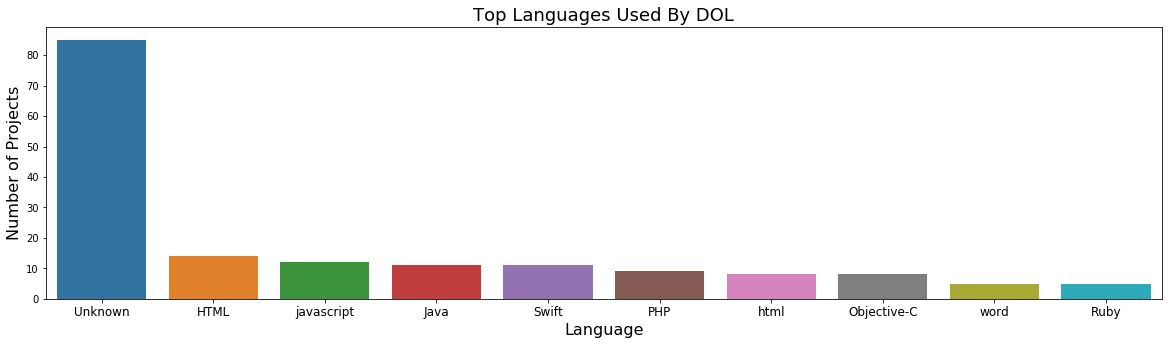

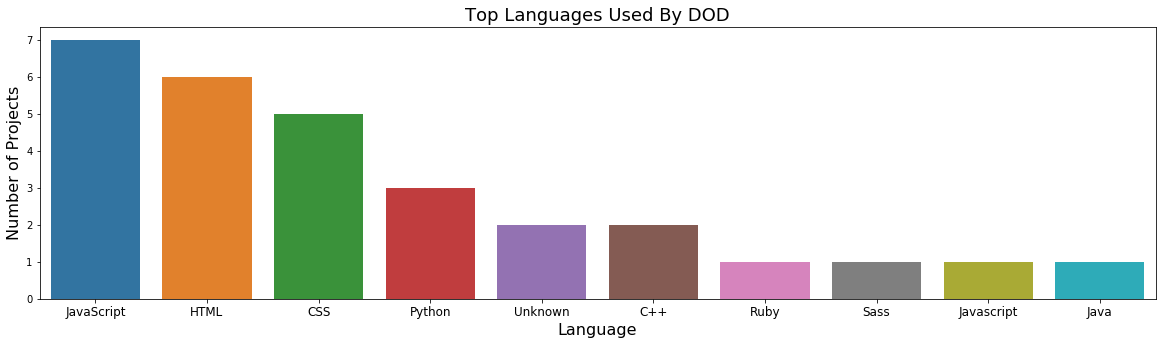

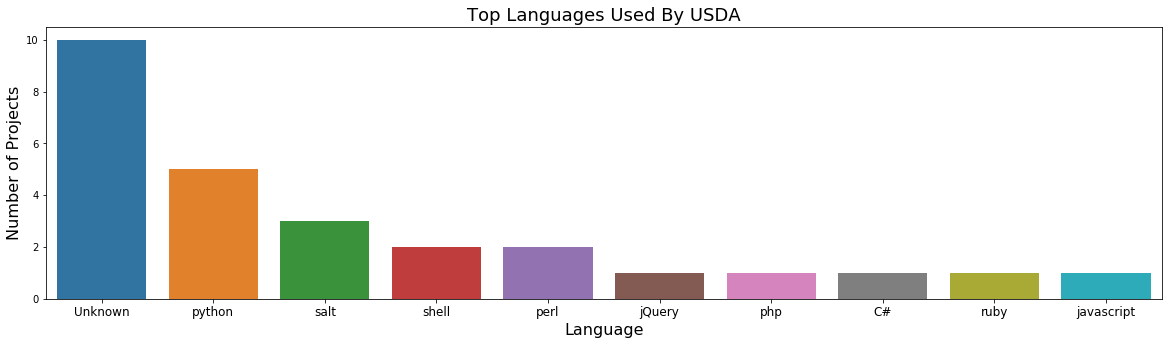

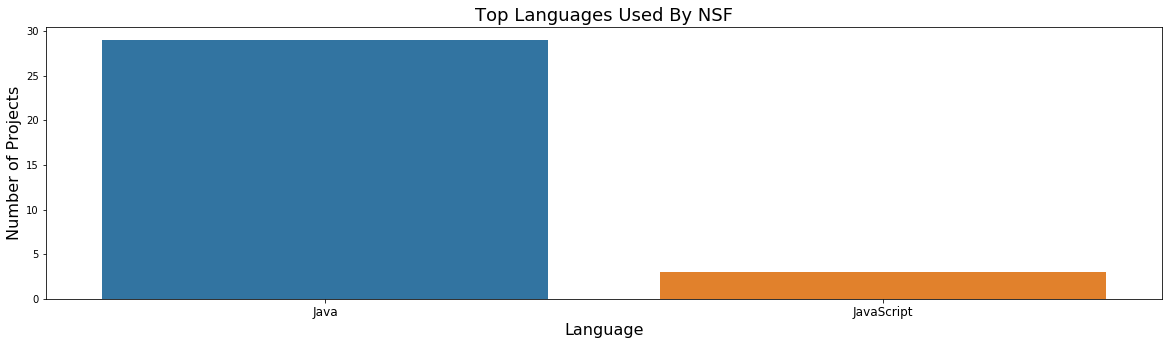

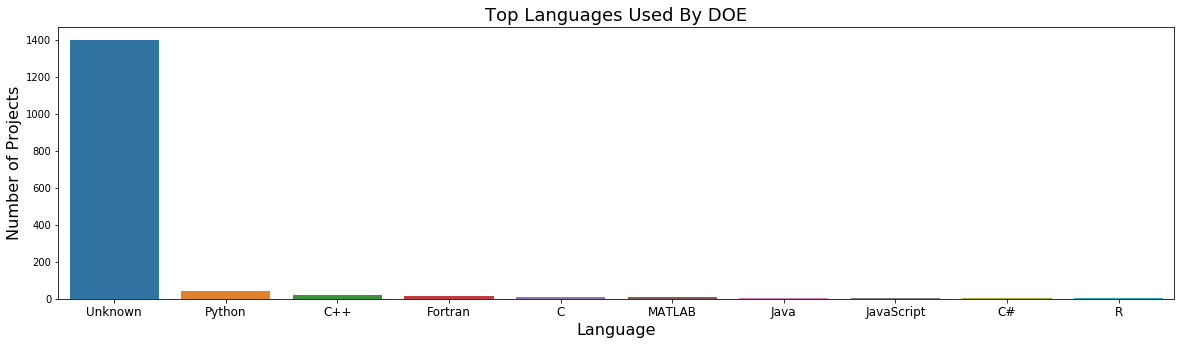

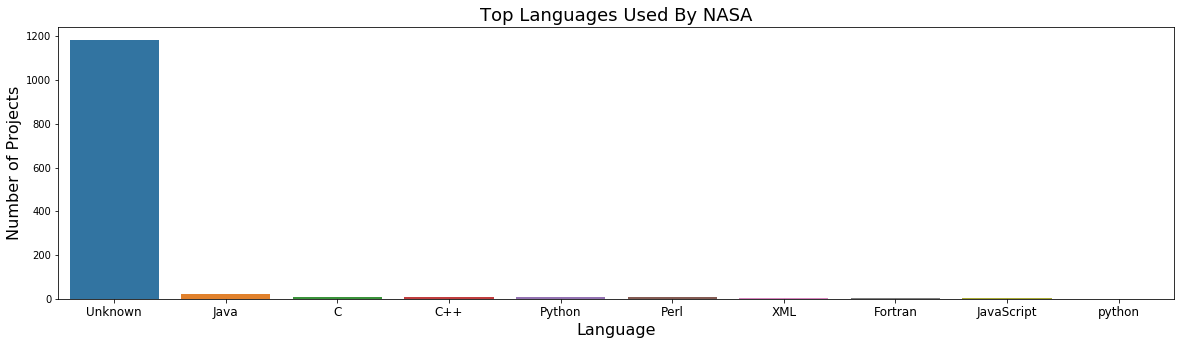

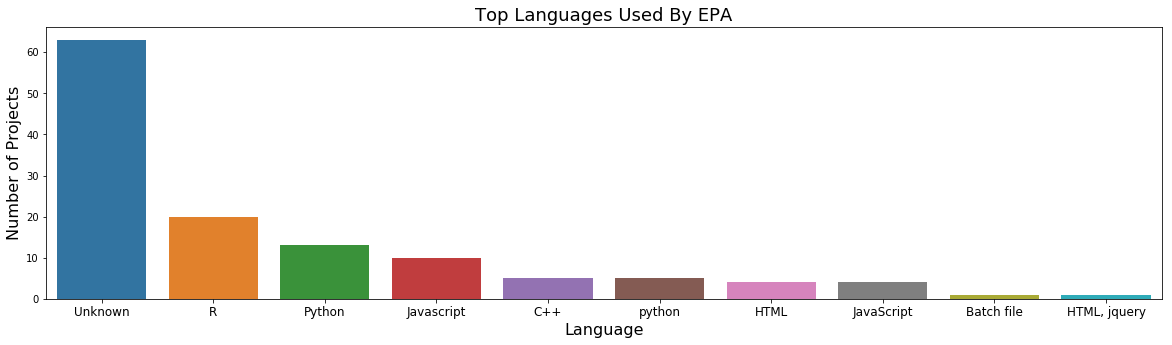

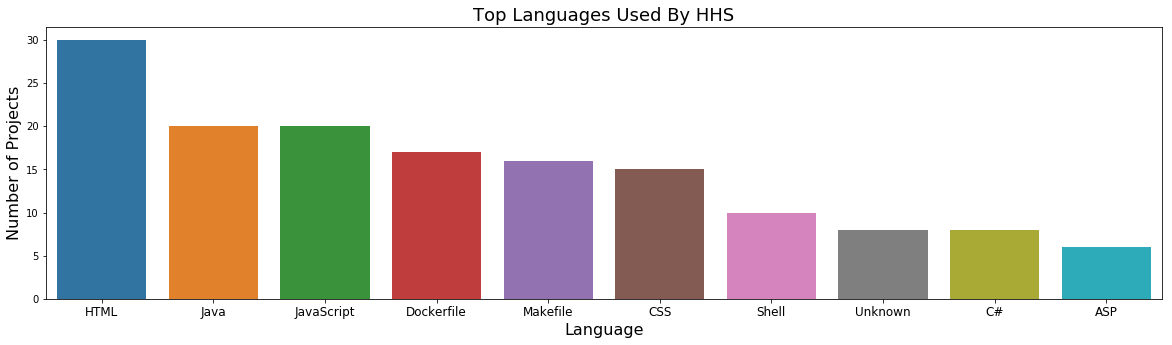

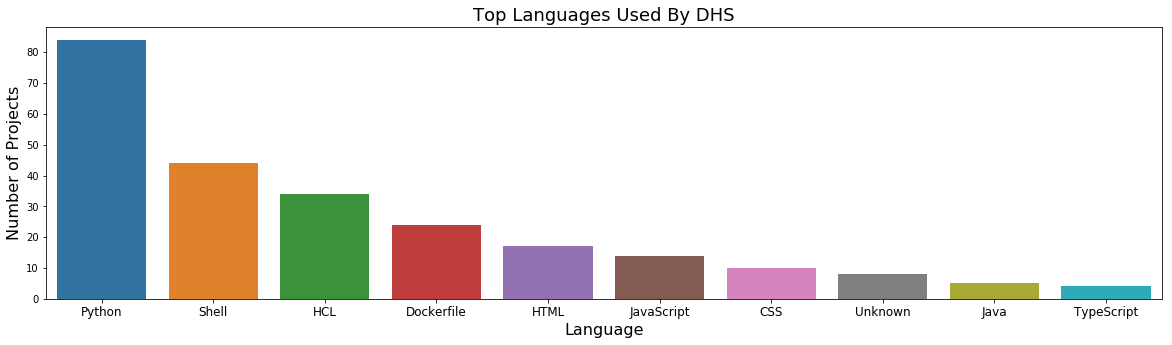

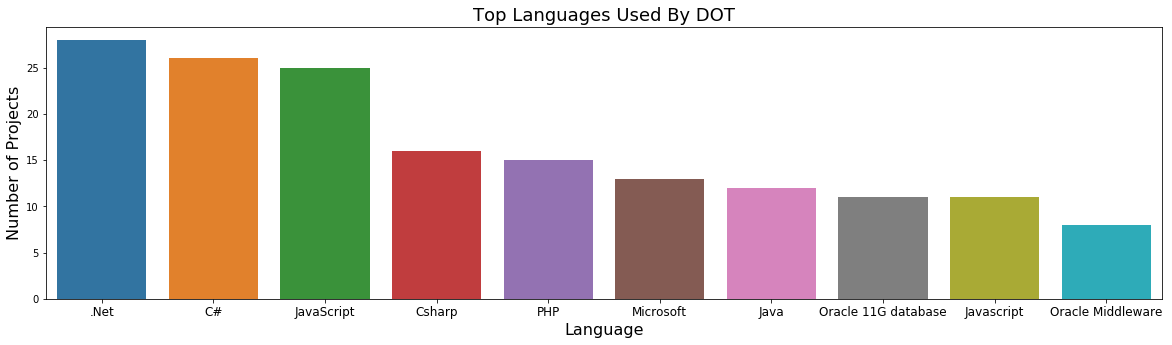

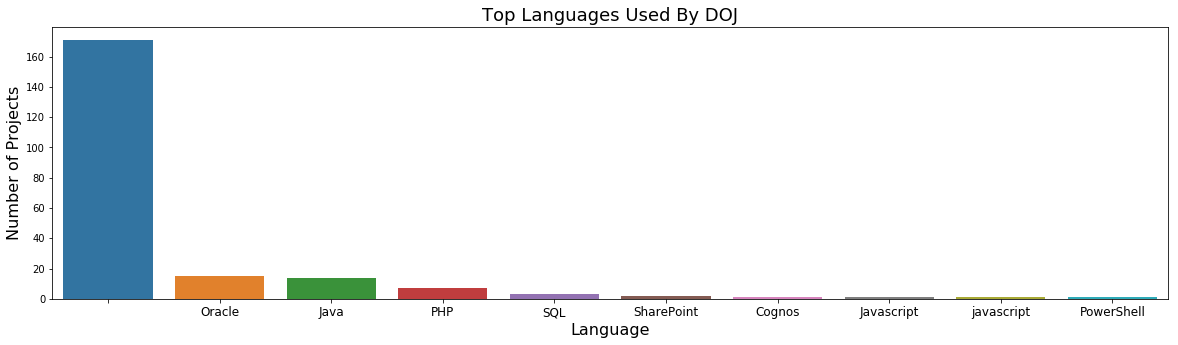

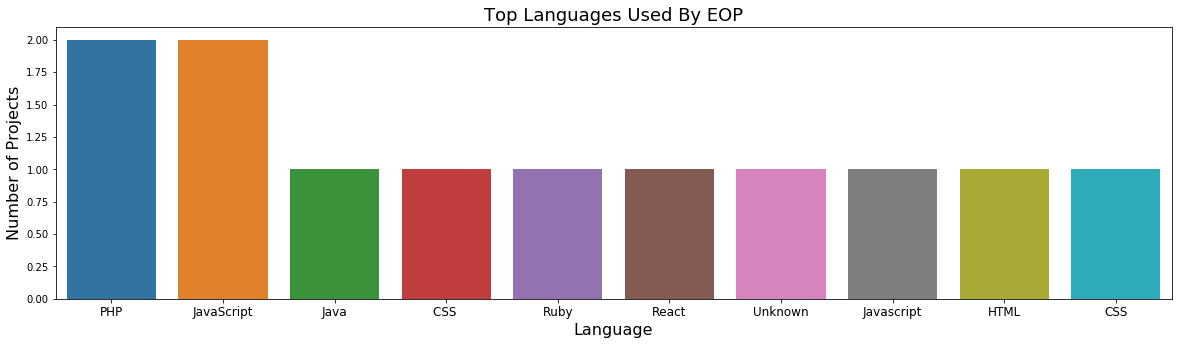

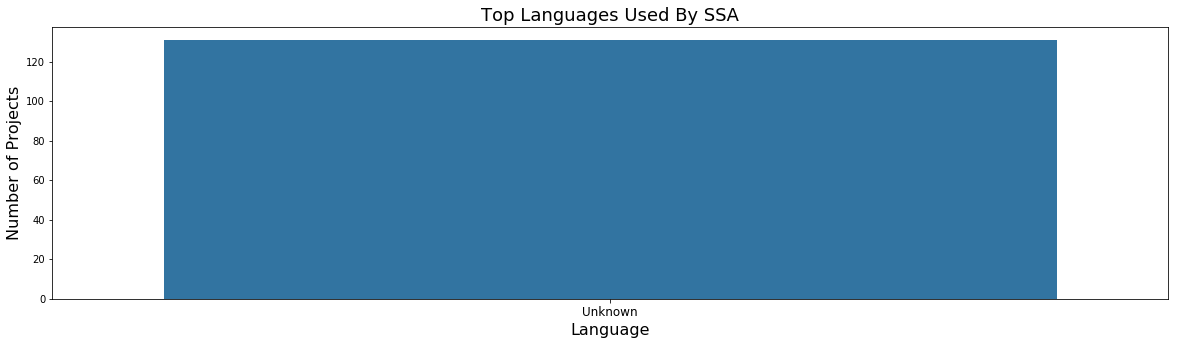

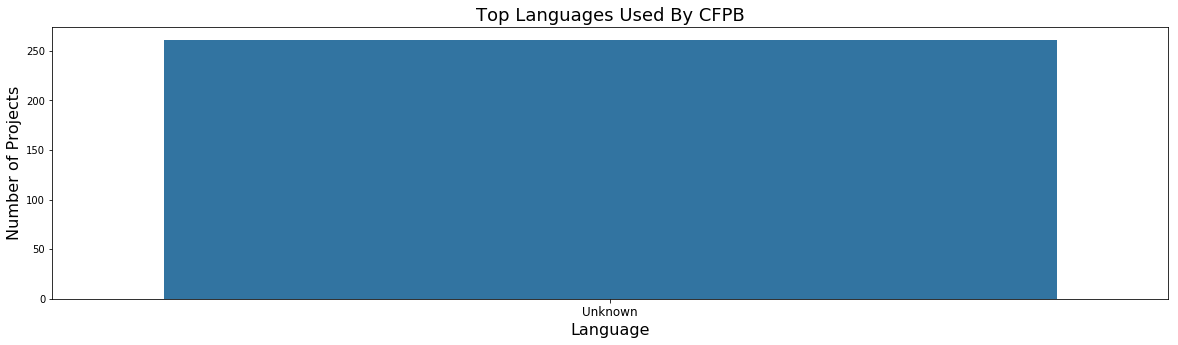

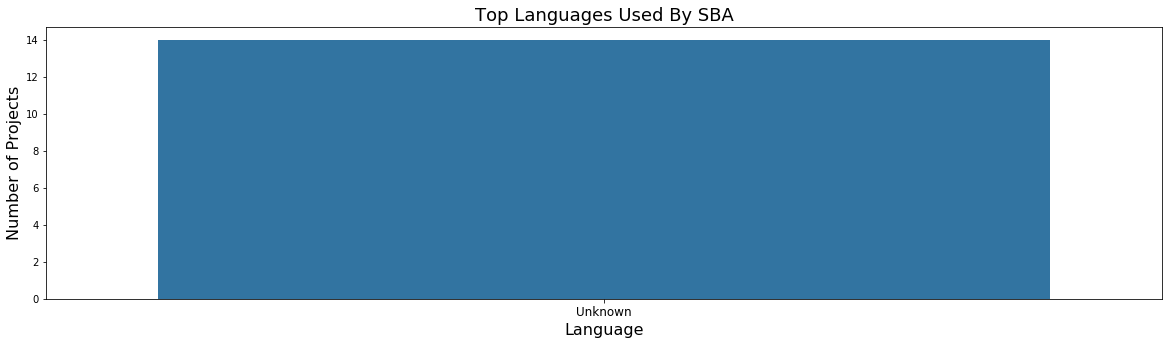

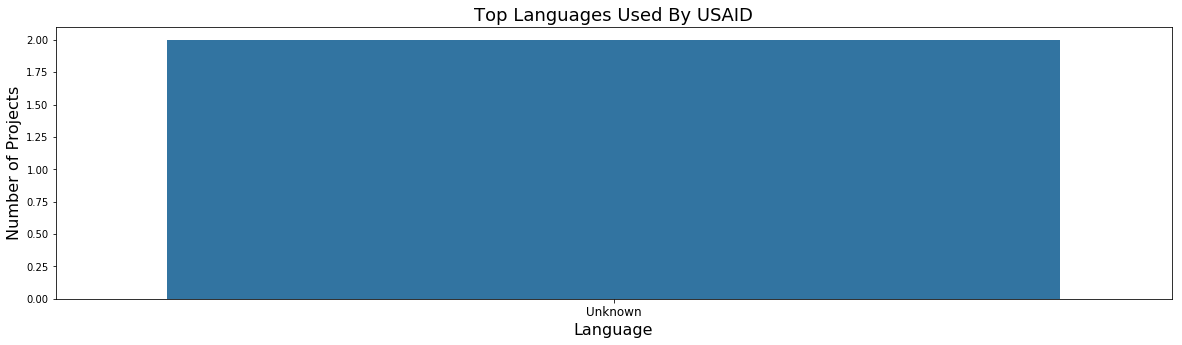

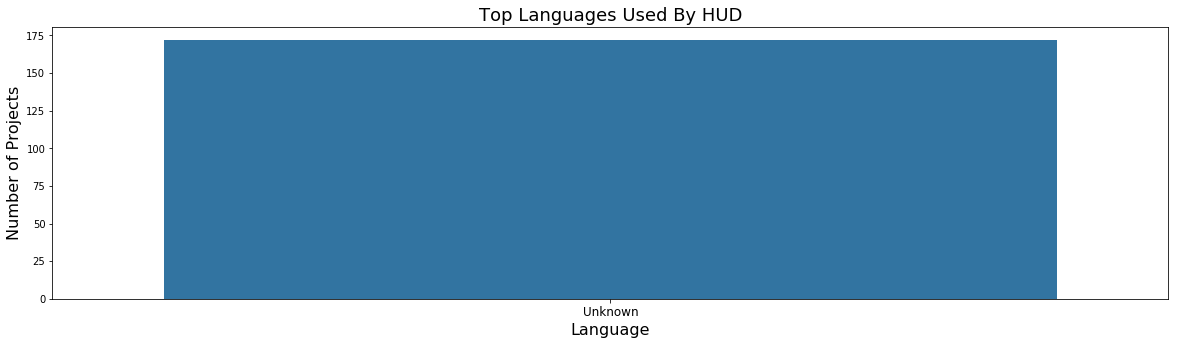

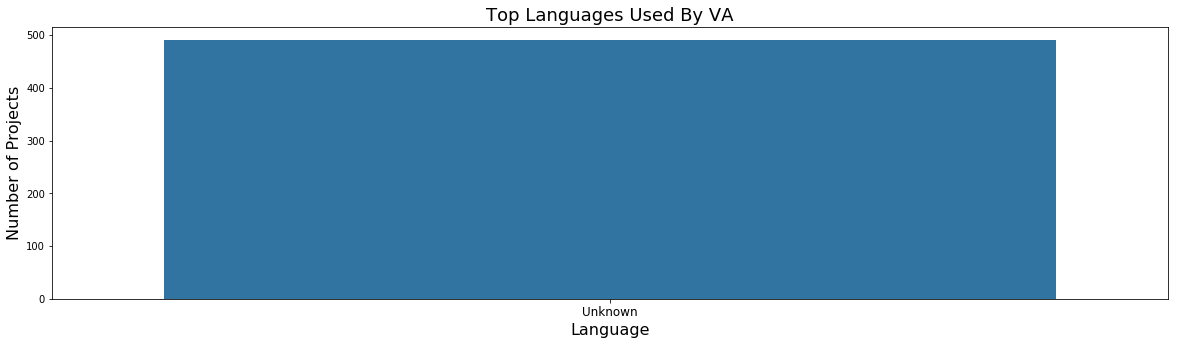

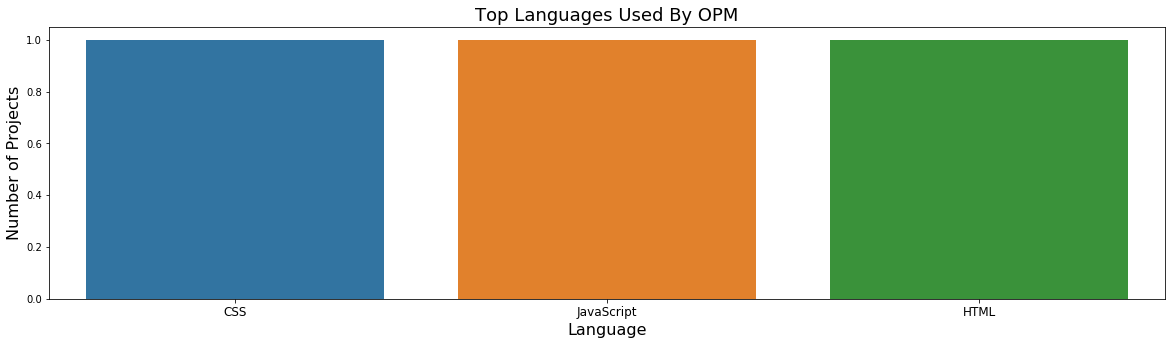

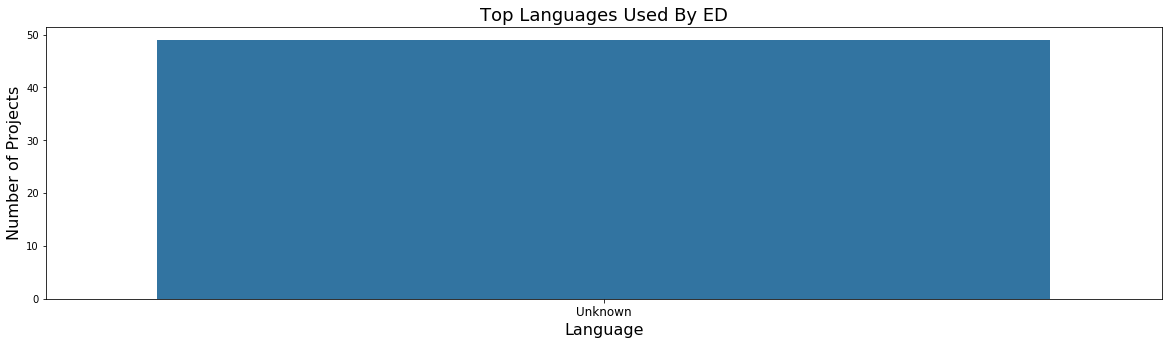

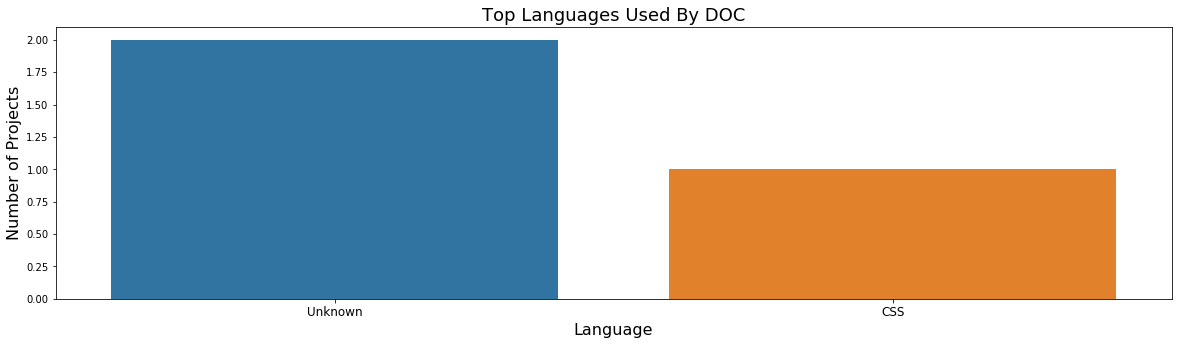

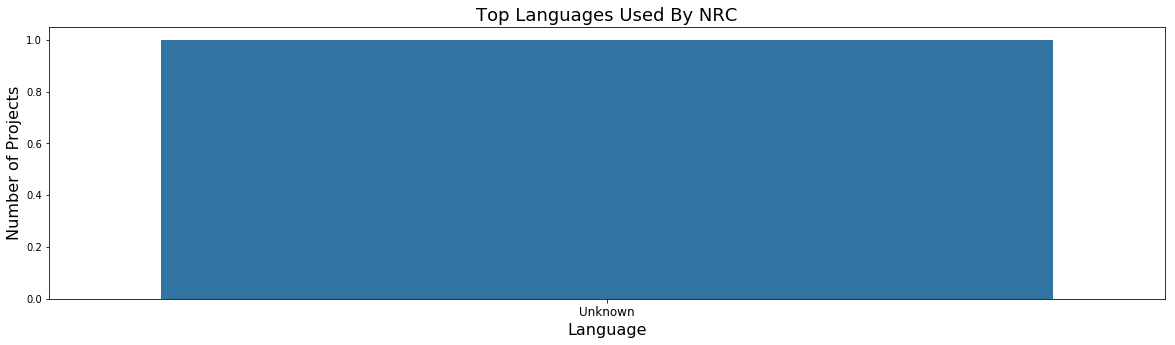

In [170]:
# create bar plots for each agency showing top 10 languages used by that agency.
for agency in unique_agencies:
    name = df[df.Agency == agency]
    plt.figure(figsize=(20,5))
    sns.barplot(name.Language.value_counts().keys()[0:10], name.Language.value_counts()[0:10])
    plt.xlabel('Language',fontsize=16)
    plt.ylabel('Number of Projects', fontsize =16)
    plt.title('Top Languages Used By {}'.format(agency),fontsize=18)
    plt.xticks(fontsize=12)

## Conclusions and Future Work

Plots were generated without a data cleaning step. We can see that there are several spelling versions of some
languages, like C++ and c++. In future work, these discrepancies should be fixed during analysis.

In this database, there are several projects with unknown languages. It's possible that these projects existed prior to the creation of this database. This work would fall on the agencies and contractors maintaining the database.

For this analysis, we didn't make use of tag and year information. We could generate plots showing how preferred languages have changed through time.

